<a href="https://colab.research.google.com/github/ArminD93/cost_livning_dataset/blob/dev/Cost_living_beverages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/Cost_living/'
%run Cost_living_configuration.ipynb

/content/drive/My Drive/ColabNotebooks/Cost_living


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 162 entries, Unnamed: 0 to Quito, Ecuador
dtypes: float64(160), object(2)
memory usage: 64.1 KB


In [2]:
# Utworzenie obiektu data frame, gdzie będą przechowywane informacje o napojach:
beverages = df_transponed['beverages']

DistributionObj = Distribution(beverages)
CorrelationObj = Correlation(dataset=beverages)


beverages.head()

Unnamed: 0                                        Cappuccino_1cup  ...  Water_1.5l_bottle
Region          Country            City                            ...                   
Caribbean       Dominican Republic Santo Domingo             1.51  ...               1.17
Central America Costa Rica         San Jose                  2.64  ...               2.16
                Mexico             Guadalajara               1.99  ...               0.73
                                   Mexico City               2.00  ...               0.66
                                   Monterrey                 2.28  ...               0.79

[5 rows x 4 columns]

In [3]:
beverages.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 160 entries, ('Caribbean', 'Dominican Republic', 'Santo Domingo') to ('Western Europe', 'Switzerland', 'Zurich')
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cappuccino_1cup     160 non-null    float64
 1   Milk_1l             160 non-null    float64
 2   Water_0.33l_bottle  160 non-null    float64
 3   Water_1.5l_bottle   160 non-null    float64
dtypes: float64(4)
memory usage: 22.9 KB


In [4]:
beverages.index

MultiIndex([(      'Caribbean', 'Dominican Republic', 'Santo Domingo'),
            ('Central America',         'Costa Rica',      'San Jose'),
            ('Central America',             'Mexico',   'Guadalajara'),
            ('Central America',             'Mexico',   'Mexico City'),
            ('Central America',             'Mexico',     'Monterrey'),
            ('Central America',             'Panama',   'Panama City'),
            (   'Central Asia',         'Kazakhstan',        'Almaty'),
            ( 'Eastern Africa',              'Kenya',       'Nairobi'),
            (   'Eastern Asia',              'China',       'Beijing'),
            (   'Eastern Asia',              'China',      'Shanghai'),
            ...
            ( 'Western Europe',             'France',         'Paris'),
            ( 'Western Europe',            'Germany',        'Berlin'),
            ( 'Western Europe',            'Germany',     'Frankfurt'),
            ( 'Western Europe',            'Germ

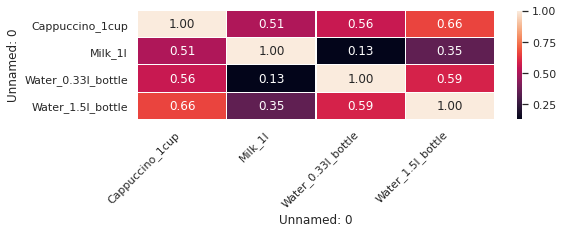

In [5]:
CorrelationObj.addCorrelationmap(8, 2)

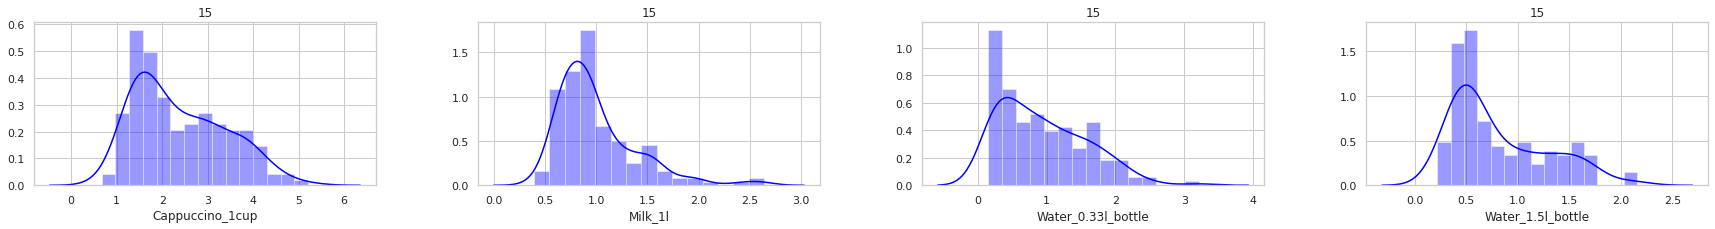

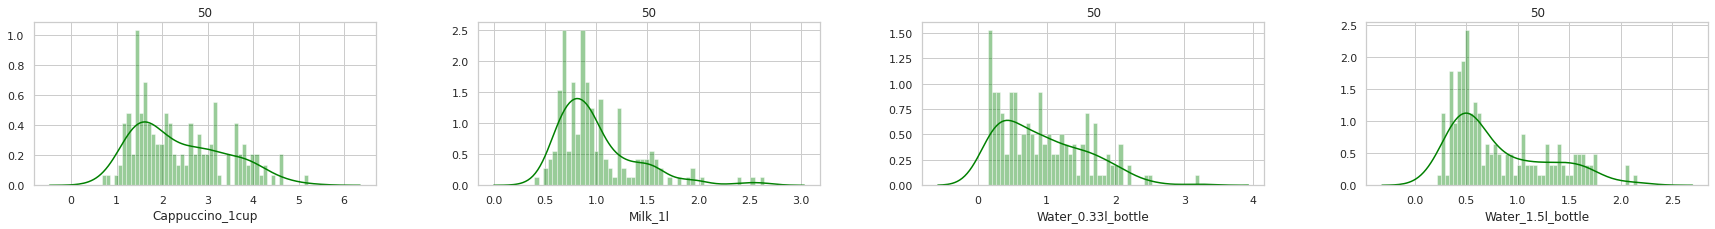

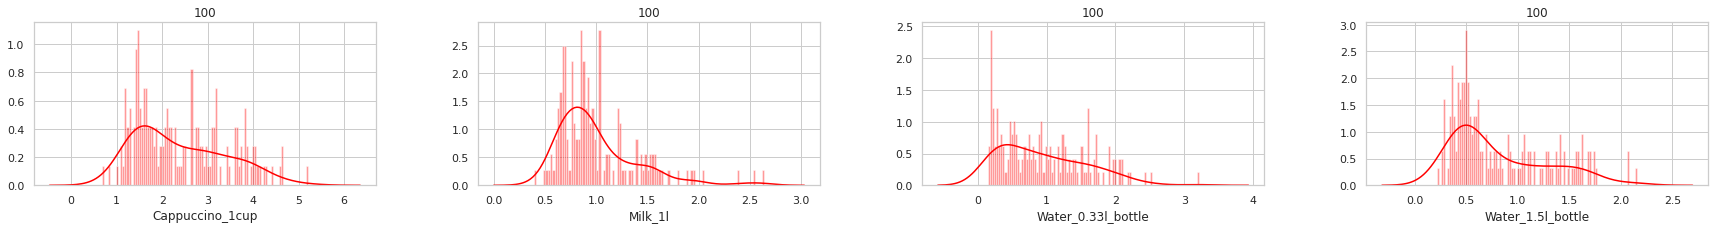

In [6]:
col_names = [ 'Cappuccino_1cup', 'Milk_1l', 'Water_0.33l_bottle', 'Water_1.5l_bottle' ]


def create_histogram(set_bins, set_color):
  fig = plt.figure(figsize=(30, 3))
  fig.subplots_adjust(hspace=0.5, wspace=0.3)

  rows= 1
  cols= 4
  col_idx = 0

  for i in range(1, 5):
    fig.add_subplot(rows, cols, i) 
    g = sns.distplot(beverages[col_names[col_idx]], bins=set_bins, color=set_color)
    g.set(title= set_bins)
    col_idx += 1

  plt.show()


create_histogram(set_bins = 15, set_color = 'blue')
create_histogram(set_bins = 50, set_color = 'green')
create_histogram(set_bins = 100, set_color = 'red')

In [7]:
beverages.reset_index(inplace=True)
beverages.head()

Unnamed: 0,Region,Country,City,Cappuccino_1cup,Milk_1l,Water_0.33l_bottle,Water_1.5l_bottle
0,Caribbean,Dominican Republic,Santo Domingo,1.51,1.03,0.46,1.17
1,Central America,Costa Rica,San Jose,2.64,1.23,1.18,2.16
2,Central America,Mexico,Guadalajara,1.99,0.87,0.51,0.73
3,Central America,Mexico,Mexico City,2.00,0.91,0.47,0.66
4,Central America,Mexico,Monterrey,2.28,0.91,0.54,0.79


In [8]:
beverages_regions = beverages[['Region', 'Cappuccino_1cup', 'Milk_1l', 'Water_0.33l_bottle', 'Water_1.5l_bottle']]

beverages_regions.set_index('Region', inplace=True)
beverages_regions.head()

Unnamed: 0,Cappuccino_1cup,Milk_1l,Water_0.33l_bottle,Water_1.5l_bottle
Region,,,,
Caribbean,1.51,1.03,0.46,1.17
Central America,2.64,1.23,1.18,2.16
Central America,1.99,0.87,0.51,0.73
Central America,2.00,0.91,0.47,0.66
Central America,2.28,0.91,0.54,0.79


In [9]:
# Pogrupowanie danych
beverages_regions = beverages_regions.groupby(by='Region')

beverages_regions_mean = beverages_regions.agg(
                                                {
                                                  'Cappuccino_1cup'    : 'mean',
                                                  'Milk_1l'            : 'mean',
                                                  'Water_0.33l_bottle' : 'mean',    
                                                  'Water_1.5l_bottle'  : 'mean',                                                                                   
                                                 }
                                               )

# Posortowanie wartości
beverages_regions_mean = beverages_regions_mean.sort_values(
                                                            by=[
                                                                'Cappuccino_1cup', 'Milk_1l',
                                                                'Water_0.33l_bottle', 'Water_1.5l_bottle'
                                                                ]
                                                            )

beverages_regions_mean.head()


,Cappuccino_1cup,Milk_1l,Water_0.33l_bottle,Water_1.5l_bottle
Region,,,,
Northern Africa,1.320000,0.677500,0.237500,0.327500
Caribbean,1.510000,1.030000,0.460000,1.170000
Southern Asia,1.565385,0.656923,0.187692,0.371538
Southern Europe,1.605000,0.885000,0.945000,0.567222
Southern Africa,1.660000,0.926667,0.666667,1.026667


In [10]:
beverages_regions_mean['mean'] = beverages_regions_mean.sum(axis=1)
beverages_regions_mean = beverages_regions_mean.sort_values(by= 'mean')
beverages_regions_mean.drop('mean', axis=1, inplace=True)

beverages_regions_mean.head()

,Cappuccino_1cup,Milk_1l,Water_0.33l_bottle,Water_1.5l_bottle
Region,,,,
Northern Africa,1.320000,0.677500,0.237500,0.327500
Southern Asia,1.565385,0.656923,0.187692,0.371538
Central Asia,1.780000,0.750000,0.310000,0.420000
Eastern Europe,1.674643,0.816429,0.705357,0.487143
Southern Europe,1.605000,0.885000,0.945000,0.567222


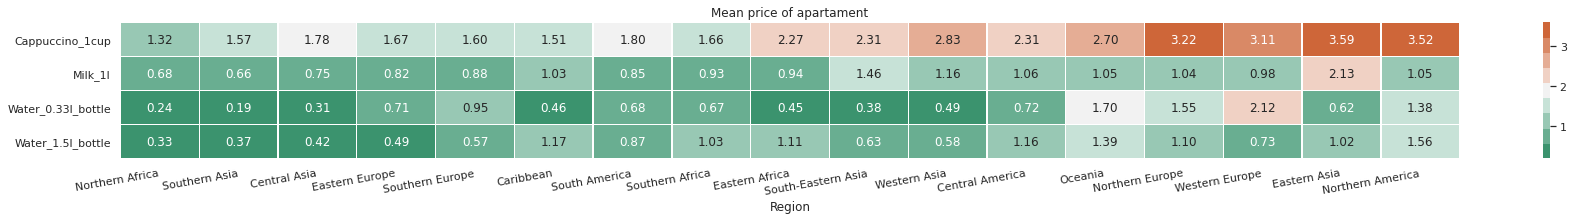

In [11]:
plt.figure(figsize=(30, 2.5))

g = sns.heatmap(beverages_regions_mean.T, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(150, 385, s=80, l=55, n=9) )
g.set( title= 'Mean price of apartament')
g.set_ylabel('')  
g.set_xticklabels( g.get_xticklabels(), rotation=10,  horizontalalignment='right' )


plt.show()